In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
xtr=pd.read_csv("/content/drive/MyDrive/ML/mnist/train_X.csv")
ytr=pd.read_csv("/content/drive/MyDrive/ML/mnist/train_label.csv")
xt=pd.read_csv("/content/drive/MyDrive/ML/mnist/test_X.csv")
yt=pd.read_csv("/content/drive/MyDrive/ML/mnist/test_label.csv")

In [4]:
xtr=np.array(xtr).T
ytr=np.array(ytr).T
xt=np.array(xt).T
yt=np.array(yt).T
print(xtr.shape)
print(ytr.shape)
print(xt.shape)
print(yt.shape)

(784, 999)
(10, 999)
(784, 349)
(10, 349)


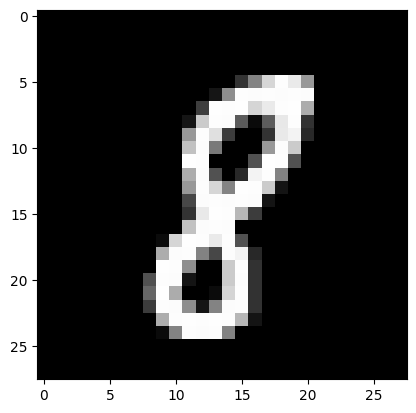

In [5]:
plt.imshow(xtr[:,np.random.randint(0,999)].reshape((28,28)),cmap='grey')
plt.show()

In [6]:
def relu(x):
  return np.maximum(0,x)
def drelu(x):
  return (x>0).astype(int)
def softmax(x):
  exp=np.exp(x-np.max(x,axis=0,keepdims=True))
  return exp/np.sum(exp,axis=0,keepdims=True)

In [7]:
def forward(x,w,b):
  z=[]
  a=[]
  a.append(x)
  for i in range(len(w)-1):
    z.append(np.dot(w[i],a[-1])+b[i])
    a.append(relu(z[i]))
  z.append(np.dot(w[-1],a[-1])+b[-1])
  a.append(softmax(z[-1]))
  return z,a

In [8]:
def cost(a,y):
  m=y.shape[1]
  e=1e-100
  return -(1/m)*np.sum(y*np.log(a+e))

In [43]:
def backward(x,y,w,b,z,a):
  m=y.shape[1]
  dz=[]
  dw=[]
  db=[]
  dz.append(a[-1]-y)
  dw.append((1/m)*np.dot(dz[-1],a[-2].T))
  db.append((1/m)*np.sum(dz[-1],axis=1,keepdims=True))

  for i in range(len(w)-1):
    dz.append(np.dot(w[-1-i].T,dz[-1])*drelu(a[-2-i]))
    dw.append((1/m)*np.dot(dz[-1],a[-3-i].T))
    db.append((1/m)*np.sum(dz[-1],axis=1,keepdims=True))

  return dw,db

In [10]:
def update(w,b,dw,db,lr):
  for i in range(len(w)):
    w[i]-=lr*dw[-1-i]
    b[i]-=lr*db[-1-i]
  return w,b

In [11]:
def init(n):
  w=[]
  b=[]
  for i in range(len(n)-1):
    w.append(np.random.randn(n[i+1],n[i])*0.01)
    b.append(np.zeros((n[i+1],1)))
  print("w-shape")
  for i in w:
    print(i.shape)
  print("b.shape")
  for i in b:
    print(i.shape)
  return w,b

In [12]:
import random

In [26]:
w,b=init([784,500,150,10])
cl=[]
for i in range(200):
  for j in range(int(999/100)):
    idx=random.sample(range(0,999),100)
    z,a=forward(xtr[:,idx],w,b)
    c=cost(a[-1],ytr[:,idx])
    cl.append(c)
    dw,db=backward(xtr[:,idx],ytr[:,idx],w,b,z,a)
    w,b=update(w,b,dw,db,0.001)

w-shape
(500, 784)
(150, 500)
(10, 150)
b.shape
(500, 1)
(150, 1)
(10, 1)


In [27]:
z,a=forward(xtr,w,b)
yp=np.argmax(a[-1],axis=0)
print(yp.shape)

(999,)


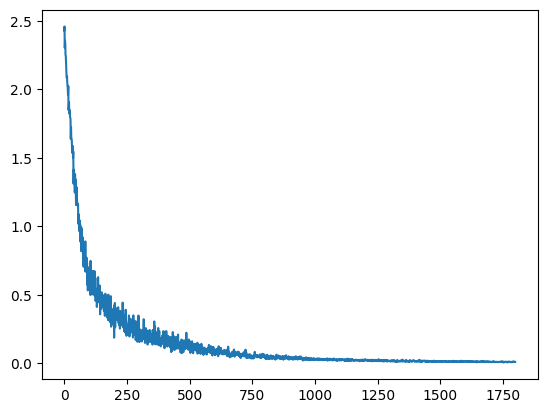

In [28]:
plt.plot(np.arange(200*int(999/100)),cl)
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(np.argmax(ytr,axis=0),yp)*100,"%")

100.0 %


In [41]:
z,a=forward(xt,w,b)
yp=np.argmax(a[-1],axis=0)
print(accuracy_score(np.argmax(yt,axis=0),yp)*100,"%")

88.53868194842407 %


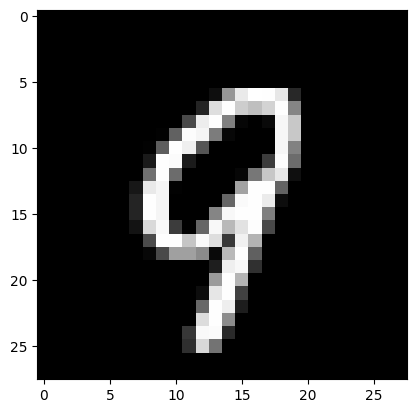

PREDICTED =  9


In [39]:
k=np.random.randint(0,350)
plt.imshow(xt[:,k].reshape((28,28)),cmap='grey')
plt.show()
print("PREDICTED = ",yp[k])